In [75]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse

In [76]:
import financedatabase as fd
# Initialize the Equities database
equities = fd.Equities()
# Obtain all data available excluding international exchanges

In [77]:
import fundamentalanalysis as fa

<AxesSubplot:title={'center':'Tech Layoffs (March 2020-Present)'}, xlabel='Month', ylabel='Number of Layoffs'>

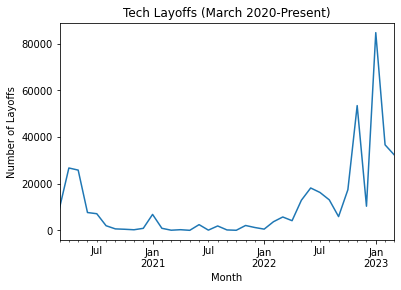

In [10]:
df = pd.read_csv("layoffs_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period('M')
df.groupby("Month").sum()["Laid_Off_Count"].plot(ylabel="Number of Layoffs", title="Tech Layoffs (March 2020-Present)")


In [14]:
equities_df = equities.select()
layoffs_df = pd.read_csv("layoffs_data.csv")
ipo_mask = (layoffs_df["Stage"] == "Post-IPO")
public_companies = layoffs_df[ipo_mask]
company_names = pd.unique(public_companies["Company"])

C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\3880149401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_companies["Date"] = pd.to_datetime(public_companies["Date"])
C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\3880149401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_companies["Month"] = public_companies["Date"].dt.to_period('M')


<AxesSubplot:title={'center':'Tech Layoffs (March 2020-Present)'}, xlabel='Month', ylabel='Number of Layoffs'>

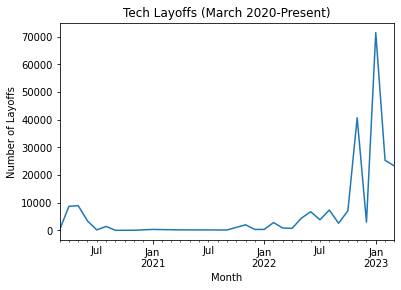

In [16]:
# public_companies = pd.read_csv("layoffs_data.csv")
public_companies["Date"] = pd.to_datetime(public_companies["Date"])
public_companies["Month"] = public_companies["Date"].dt.to_period('M')
public_companies.groupby("Month").sum()["Laid_Off_Count"].plot(ylabel="Number of Layoffs", title="Tech Layoffs (March 2020-Present)")

In [22]:
from googlesearch import search

In [23]:
# https://github.com/MakonnenMak/company-name-to-ticker-yahoo-finance/blob/master/name_to_tick.py
def retrieve_ticker(company_name):
    searchval = 'yahoo finance '+ company_name
    urls = search(searchval, tld='es', lang='es')
    url = next(urls)
    while urlparse(url).netloc != 'finance.yahoo.com':
        url = next(urls)

    url = str(url)
    tokens = url.split("/")
    if tokens[-1] == '':
        ticker = tokens[-2]
    else:
        x = tokens[-1].split('=')
        ticker = x[-1]
    return ticker

In [41]:
tickers_to_names = {}
for i, company_name in enumerate(company_names, 1):
    ticker = retrieve_ticker(company_name)
    tickers_to_names[ticker] = company_name
    tickers.append(ticker)
    if i%10 == 0:
        print(f"Ticker {i}/{len(company_names)} completed.")

Ticker 10/324 completed.
Ticker 20/324 completed.
Ticker 30/324 completed.
Ticker 40/324 completed.
Ticker 50/324 completed.
Ticker 60/324 completed.
Ticker 70/324 completed.
Ticker 80/324 completed.
Ticker 90/324 completed.
Ticker 100/324 completed.
Ticker 110/324 completed.
Ticker 120/324 completed.
Ticker 130/324 completed.
Ticker 140/324 completed.
Ticker 150/324 completed.
Ticker 160/324 completed.
Ticker 170/324 completed.
Ticker 180/324 completed.
Ticker 190/324 completed.
Ticker 200/324 completed.
Ticker 210/324 completed.
Ticker 220/324 completed.
Ticker 230/324 completed.
Ticker 240/324 completed.
Ticker 250/324 completed.
Ticker 260/324 completed.
Ticker 270/324 completed.
Ticker 280/324 completed.
Ticker 290/324 completed.
Ticker 300/324 completed.
Ticker 310/324 completed.
Ticker 320/324 completed.


In [124]:
names_to_tickers = {value:key.upper().rstrip() for key, value in tickers_to_names.items()}

In [125]:
names_to_tickers

{'Logitech': 'LOGI',
 'Wejo': 'WEJO',
 'Marvell': 'MRVL',
 'Expedia': 'EXPE',
 'Laybuy': 'LBY.AX',
 'Amazon': 'AMZN',
 'Coherent': 'COHR',
 'Leafly': 'LFLY',
 'Freshworks': 'FRSH',
 'Boxed': 'BOXD',
 'Meta': 'META',
 'Samsung': '005930.KS',
 'GoTo Group': 'GOTO.JK',
 'Xero': 'XRO.AX',
 'Neoleukin Therapeutics': 'NLTX',
 'Take-Two Interactive': 'TTWO',
 'Atlassian': 'TEAM',
 'SiriusXM': 'SIRI',
 'Embark Trucks': 'EMBK',
 'Airbnb': 'ABNB',
 'Accolade': 'ACCD',
 'Zscaler': 'ZS',
 'Thoughtworks': 'TWKS',
 'Sonder': 'SOND',
 'Electronic Arts': 'EA',
 'Eventbrite': 'EB',
 'MeridianLink': 'MLNK',
 'Sono Motors': 'SEV',
 'Palantir': 'PLTR',
 'Twitter': 'TWTR',
 'Ericsson': 'ERIC',
 'Lucira Health': 'LHDX',
 'EVgo': 'EVGO',
 'TaskUs': 'TASK',
 'Criteo': 'CRTO',
 'Zalando': 'ZAL.DE',
 'HP': 'HPQ',
 'Tencent': 'TCEHY',
 'Digimarc': 'DMRC',
 'DocuSign': 'DOCU',
 'The RealReal': 'REAL',
 'Smartsheet': 'SMAR',
 'Wix': 'WIX',
 'DigitalOcean': 'DOCN',
 'Sprinklr': 'CXM',
 'Momentive': 'MNTV',
 'Vicari

In [46]:
invalid_tickers = ["ForeScout", "MindBody", "Rubicon Project", "Castlight Health"]

In [47]:
for ticker in invalid_tickers:
    del names_to_tickers[ticker]

In [129]:
tickers_to_names = {value.upper().rstrip():key.rstrip() for key, value in names_to_tickers.items()}

In [130]:
import json
with open("all_tickers.json", "w") as f:
    json.dump(tickers_to_names, f)

In [131]:
tickers_to_names["TWTR"]

'Twitter'

In [28]:
searchval = 'yahoo finance '+ "Oracle"
# limits to the first link
link = []
for url in search(searchval, tld='es', lang='es', stop=1):
    link.append(url)
link = str(link[0])

In [31]:
with open("tickers.txt", "w") as f:
    f.writelines('\n'.join(tickers))

In [32]:
incorrect_indices = [23, 140, 221, 306, 308, 317]

In [37]:
for i, company in enumerate(company_names[incorrect_indices]):
    ticker = retrieve_ticker(company)
    print(i, ticker, company)

0 TWTR Twitter
1 forescout-addresses-modern-secops-challenges-150000735.html ForeScout
2 wellness-is-changing-mind-body-ceo-explains-132904781.html MindBody
3 rubicon-project-rubi-stock-sinks-214509329.html Rubicon Project
4 castlight-health-great-value-stock-122728350.html Castlight Health
5 MAVEN.ST Maven


### Retrieving Tickers

In [135]:
with open("all_tickers.json", "r") as f:
    all_tickers = json.load(f)

In [136]:
valid_tickers = {}
for ticker in all_tickers:
    try:
        equities_df.loc[ticker]
    except KeyError:
        continue
    valid_tickers[ticker] = all_tickers[ticker]

In [137]:
with open("valid_tickers.json", "w") as f:
    json.dump(valid_tickers, f)

In [138]:
layoff_companies = equities_df.loc[valid_tickers.keys()]

In [139]:
len(valid_tickers)

190

## FA Usage

In [80]:
api_key = "7bd626c54d9c2c21cbb1bf9553c82e2a"

In [80]:
income_statement = fa.income_statement("MSFT", api_key, period="annual", limit=3)

In [82]:
growth_annually = fa.financial_statement_growth("MSFT", api_key, period="annual", limit=3)

In [84]:
key_metrics_annually = fa.key_metrics("MSFT", api_key, period="annual", limit=3)

In [88]:
cash_flow_statement_annually = fa.cash_flow_statement("MSFT", api_key, period="annual", limit=3)

In [90]:
financial_ratios_annually = fa.financial_ratios("MSFT", api_key, period="annual", limit=3)

In [91]:
financial_ratios_annually

,2022,2021,2020
period,FY,FY,FY
currentRatio,1.784607,2.079994,2.515765
quickRatio,1.567174,1.899196,2.33077
cashRatio,0.146516,0.160439,0.187747
daysOfSalesOutstanding,81.481137,82.609675,81.697829
daysOfInventoryOutstanding,21.800958,18.420509,15.01096
operatingCycle,103.282095,101.030183,96.708789
daysOfPayablesOutstanding,110.694334,105.959852,99.254525
cashConversionCycle,-7.412239,-4.929669,-2.545736
grossProfitMargin,0.684017,0.689258,0.67781


In [82]:
from collections import defaultdict

In [109]:
valid_tickers

{'LOGI': 'Logitech',
 'MRVL': 'Marvell',
 'EXPE': 'Expedia',
 'AMZN': 'Amazon',
 'COHR': 'Coherent',
 'META': 'Meta',
 'NLTX': 'Neoleukin Therapeutics',
 'TTWO': 'Take-Two Interactive',
 'TEAM': 'Atlassian',
 'SIRI': 'SiriusXM',
 'ABNB': 'Airbnb',
 'ACCD': 'Accolade',
 'ZS': 'Zscaler',
 'EA': 'Electronic Arts',
 'EB': 'Eventbrite',
 'PLTR': 'Palantir',
 'TWTR': 'Twitter',
 'ERIC': 'Ericsson',
 'LHDX': 'Lucira Health',
 'CRTO': 'Criteo',
 'HPQ': 'HP',
 'TCEHY': 'Tencent',
 'DMRC': 'Digimarc',
 'DOCU': 'DocuSign',
 'REAL': 'The RealReal',
 'SMAR': 'Smartsheet',
 'WIX': 'Wix',
 'DOCN': 'DigitalOcean',
 'TWLO': 'Twilio',
 'TMDI': 'Titan Medical',
 'OPRT': 'Oportun',
 'GDDY': 'GoDaddy',
 'AFRM': 'Affirm',
 'ZM': 'Zoom',
 'EBAY': 'eBay',
 'SCWX': 'SecureWorks',
 'DELL': 'Dell',
 'OKTA': 'Okta',
 'ADSK': 'Autodesk',
 'DM': 'Desktop Metal',
 'SPLK': 'Splunk',
 'PINS': 'Pinterest',
 'DKNG': 'DraftKings',
 'CYRN': 'Cyren',
 'FREQ': 'Frequency Therapeutics',
 'MTCH': 'Match Group',
 'PYPL': 'PayP

In [96]:
data_dict = defaultdict(dict)

In [83]:
for ticker in valid_tickers:
    # categories = ["income_statement", "growth", "key_metrics", "cash_flow", "financial_ratios"]
    if ticker not in data_dict:
        data_dict[ticker]["key_metrics"] = fa.key_metrics(ticker, api_key, period="annual", limit=3)
        data_dict[ticker]["growth"] = fa.financial_statement_growth(ticker, api_key, period="annual", limit=3)
        data_dict[ticker]["income_statement"] = fa.income_statement(ticker, api_key, period="annual", limit=3)
        data_dict[ticker]["cash_flow"] = fa.cash_flow_statement(ticker, api_key, period="annual", limit=3)
        data_dict[ticker]["financial_ratios"] = fa.financial_ratios(ticker, api_key, period="annual", limit=3)

ValueError: This endpoint is only for premium members. Please visit the subscription page to upgrade the plan (Starter or higher) at https://financialmodelingprep.com/developer/docs/pricing

## Parsing Through Data

In [85]:
import pickle

In [98]:
with open('data_dict.pickle', 'wb') as handle:
    pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [97]:
with open('data_dict.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)
#     print(b.keys() == data_dict.keys())

In [143]:
valid_names = {val:key for key, val in valid_tickers.items()}

In [146]:
with open("valid_names.json", "w") as f:
    json.dump(valid_names, f)

In [151]:
public_companies["Ticker"] = public_companies["Company"].map(valid_names)

C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\1577371265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_companies["Ticker"] = public_companies["Company"].map(valid_names)


In [93]:
public_companies["Year"] = [d.year for d in public_companies["Date"]]

C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\1825408848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_companies["Year"] = [d.year for d in public_companies["Date"]]


In [154]:
public_companies = public_companies[~public_companies["Ticker"].isna()]

In [155]:
public_companies

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Month,Year,Ticker
4,Logitech,Geneva,Hardware,300.0,2023-03-22,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-03-23 16:47:11,Switzerland,NaN,Unknown,2023-03,2023.0,LOGI
10,Marvell,SF Bay Area,Hardware,320.0,2023-03-21,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-03-21 23:29:14,United States,0.04,Unknown,2023-03,2023.0,MRVL
16,Expedia,Seattle,Travel,NaN,2023-03-21,https://www.geekwire.com/2023/expedia-group-la...,3300.0,Post-IPO,2023-03-22 23:59:38,United States,NaN,Unknown,2023-03,2023.0,EXPE
20,Amazon,Seattle,Retail,9000.0,2023-03-20,https://www.cnbc.com/2023/03/20/amazon-layoffs...,108.0,Post-IPO,2023-03-20 15:07:51,United States,NaN,Unknown,2023-03,2023.0,AMZN
25,Coherent,SF Bay Area,Manufacturing,108.0,2023-03-16,https://www.siliconvalley.com/2023/03/16/coher...,NaN,Post-IPO,2023-03-17 04:11:53,United States,NaN,Unknown,2023-03,2023.0,COHR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,Eventbrite,SF Bay Area,Consumer,500.0,2020-04-08,https://layoffs.fyi/2020/04/13/eventbrite-laid...,332.0,Post-IPO,2020-04-08 20:36:31,United States,0.45,Unknown,2020-04,2020.0,EB
2207,Sage Therapeutics,Boston,Healthcare,340.0,2020-04-07,https://www.biopharmadive.com/news/sage-restr...,438.0,Post-IPO,2020-04-08 22:22:07,United States,0.53,Unknown,2020-04,2020.0,SAGE
2208,Redfin,Seattle,Real Estate,236.0,2020-04-07,https://www.geekwire.com/2020/redfin-lays-off-...,319.0,Post-IPO,2020-04-07 21:49:36,United States,0.07,Unknown,2020-04,2020.0,RDFN
2352,Mogo,Vancouver,Finance,78.0,2020-03-27,https://betakit.com/mogo-lays-off-30-percent-o...,201.0,Post-IPO,2020-04-03 14:40:07,Canada,0.30,Unknown,2020-03,2020.0,MOGO


In [160]:
equities_df["Ticker"] = equities_df.index

In [163]:
layoff_df = pd.merge(equities_df, public_companies, on="Ticker")

In [183]:
layoff_df['market_cap'].value_counts()/layoff_df.shape[0]

Large Cap    0.418182
Mid Cap      0.309091
Small Cap    0.123636
Mega Cap     0.094545
Micro Cap    0.050909
Nano Cap     0.003636
Name: market_cap, dtype: float64

In [188]:
equities_df["market_cap"].value_counts()/equities_df.shape[0]

Nano Cap     0.291984
Small Cap    0.214368
Micro Cap    0.168784
Mid Cap      0.150401
Large Cap    0.113984
Mega Cap     0.004683
Name: market_cap, dtype: float64

In [195]:
layoff_market_cap_counts

Large Cap    0.418182
Mega Cap     0.094545
Micro Cap    0.050909
Mid Cap      0.309091
Nano Cap     0.003636
Small Cap    0.123636
Name: market_cap, dtype: float64

In [206]:
for row in public_companies.iterrows():
    print(row["Company"])

TypeError: tuple indices must be integers or slices, not str

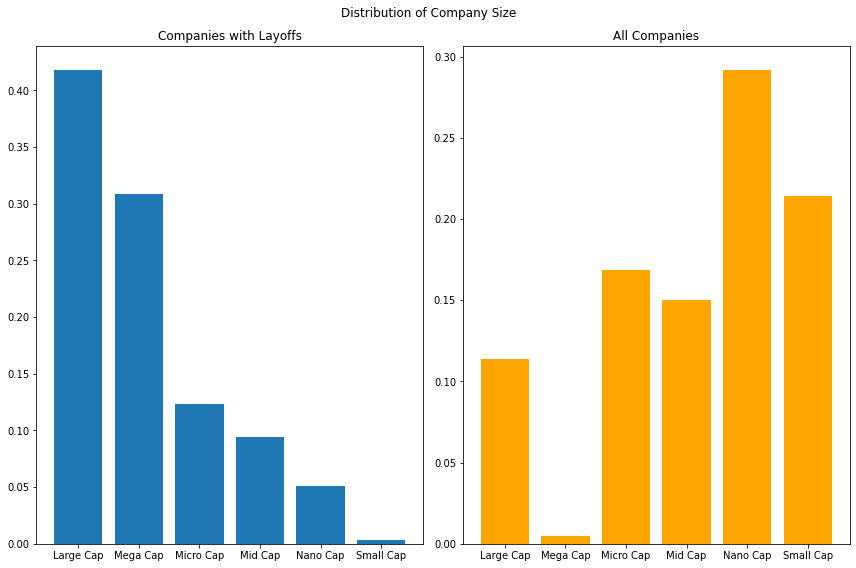

In [202]:
import matplotlib.pyplot as plt
layoff_market_cap_counts = (layoff_df['market_cap'].value_counts() / layoff_df.shape[0]).sort_index()
all_market_cap_counts = (equities_df["market_cap"].value_counts()/equities_df.shape[0]).sort_index()
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].bar(layoff_market_cap_counts.index, market_cap_counts)
axs[0].set_title("Companies with Layoffs")
axs[1].bar(all_market_cap_counts.index, all_market_cap_counts, color="orange")
axs[1].set_title("All Companies")
fig.suptitle("Distribution of Company Size")
plt.grid(False)
plt.tight_layout()

In [209]:
year_dict = defaultdict((lambda: defaultdict(dict)))

## Reorganizing Dict

In [212]:
for ticker in data_dict:
    for group in data_dict[ticker]:
        df = data_dict[ticker][group]
        years = df.columns
        for year in years:
            year_dict[float(year)][ticker][group] = df[year]

In [217]:
public_companies["Index"] = public_companies.index

C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\240314413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_companies["Index"] = public_companies.index


In [228]:
indices = defaultdict(list)
for i, ticker, year in zip(public_companies.index, public_companies["Ticker"], public_companies["Year"]):
    prev_year = year - 1
    if prev_year in year_dict:
        groups = year_dict[prev_year][ticker]
        for group in groups:
            series = groups[group]
            indices[i].append(series)
row_dict = {index:pd.concat(rows) for index, rows in indices.items()}

In [231]:
row_df = pd.DataFrame.from_dict(row_dict, orient="index")

## Total Data!!!

In [234]:
total_df = pd.merge(row_df, public_companies, left_index=True, right_index=True)

In [211]:
data_dict["META"]["key_metrics"].columns

Index(['2022', '2021', '2020'], dtype='object')

## f

In [115]:
tech_companies = equities_df[equities_df["sector"] == 'Information Technology']

In [236]:
total_df.to_csv("layoff_tech_companies.csv")

## Getting data for Non Layoff companies

In [242]:
layoff_tickers = set(total_df["Ticker"])

In [248]:
non_layoff_mask = ~tech_companies.index.isin(layoff_tickers)

In [251]:
non_layoff_companies = tech_companies.loc[non_layoff_mask, :]

In [254]:
non_layoff_tickers = non_layoff_companies.index

In [260]:
non_layoff_dict = defaultdict(dict)

In [271]:
ticker_list = np.random.choice(non_layoff_tickers, size=50, replace=False)

In [275]:
from collections import defaultdict
from urllib.error import HTTPError
import fundamentalanalysis as fa
from typing import List, Dict

def retrieve_fundamental_data(tickers: List[str], api_key: str, data_dict: Dict[str, Dict] = defaultdict(dict)) -> Dict[str, Dict]:
    """
    Retrieves fundamental data of a list of tickers using the Fundamental Analysis API.

    Args:
        tickers (List[str]): List of tickers to retrieve fundamental data for.
        api_key (str): API key to access the Fundamental Analysis API.
        data_dict (Dict[str, Dict], optional): Default dictionary to store retrieved data. 
                                               Defaults to an empty dictionary.

    Returns:
        Dict[str, Dict]: A dictionary containing the retrieved fundamental data for each ticker.

    Raises:
        HTTPError: If there is an issue retrieving data from the Fundamental Analysis API.
    """

    # loop through each ticker in the given list of tickers
    for ticker in tickers:
        try:
            # check if the ticker data is already in the data_dict
            if ticker not in data_dict:
                # retrieve the key metrics, growth, income statement, cash flow statement, and financial ratios 
                # for the ticker using the Fundamental Analysis API and store in the data_dict
                
                # TODO: add check to see if ticker is valid
                data_dict[ticker]["key_metrics"] = fa.key_metrics(ticker, api_key, period="annual", limit=3)
                data_dict[ticker]["growth"] = fa.financial_statement_growth(ticker, api_key, period="annual", limit=3)
                data_dict[ticker]["income_statement"] = fa.income_statement(ticker, api_key, period="annual", limit=3)
                data_dict[ticker]["cash_flow"] = fa.cash_flow_statement(ticker, api_key, period="annual", limit=3)
                data_dict[ticker]["financial_ratios"] = fa.financial_ratios(ticker, api_key, period="annual", limit=3)
        except HTTPError:
            # if there is an error retrieving data from the API, return the current data_dict
            return data_dict
    # return the updated data_dict
    return data_dict

In [277]:
new_api_key = "4d0816935c5471cf2d3b3a0afbb1086e"
non_layoff_dict = retrieve_fundamental_data(ticker_list, new_api_key, non_layoff_dict)

In [280]:
with open('non_layoff_dict.pickle', 'wb') as handle:
    pickle.dump(non_layoff_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [379]:
def average_df(test_df):
    output_dict = {}
    for col in test_df.columns:
        numeric = pd.to_numeric(test_df[col], errors="coerce")
        cannot_convert = numeric.isnull().all()
        if not cannot_convert:
            output_dict[col] = [numeric.squeeze().mean()]
        else:
            output_dict[col] = np.random.choice(numeric)
    output_df = pd.DataFrame(output_dict)
    return output_df
    

In [363]:
dic = eval("{'revenuePerShare': 11.274692295614782, 'netIncomePerShare': 1.128616623974541, 'operatingCashFlowPerShare': 3.068219342028699, 'freeCashFlowPerShare': 1.492018237171086, 'cashPerShare': 4.907123132787934, 'bookValuePerShare': 13.184707028523599, 'tangibleBookValuePerShare': 16.200370410748018, 'shareholdersEquityPerShare': 13.184707028523599, 'interestDebtPerShare': 1.2471889077829605, 'marketCap': 900497536.6666666, 'enterpriseValue': 684537203.3333334, 'peRatio': 15.481105165174172, 'priceToSalesRatio': 1.2786502834774918, 'pocfratio': 4.9243567947517, 'pfcfRatio': 12.322545838841584, 'pbRatio': 1.0959833041954037, 'ptbRatio': 1.0959833041954037, 'evToSales': 0.9711954210034307, 'enterpriseValueOverEBITDA': 3.5657437373841314, 'evToOperatingCashFlow': 3.744396272683879, 'evToFreeCashFlow': 9.486869300108534, 'earningsYield': 0.07255855589594118, 'freeCashFlowYield': 0.09668889766582867, 'debtToEquity': 0.07191638216187014, 'debtToAssets': 0.2032873075192598, 'netDebtToEBITDA': -1.1302147466564432, 'currentRatio': 3.3170895730915784, 'interestCoverage': 65.73787635572643, 'incomeQuality': 3.088466863651955, 'payoutRatio': 0.0, 'salesGeneralAndAdministrativeToRevenue': 0.0, 'researchAndDdevelopementToRevenue': 0.026073083067128546, 'intangiblesToTotalAssets': 0.0011635688064347304, 'capexToOperatingCashFlow': -0.543038785141806, 'capexToRevenue': -0.1390908466972209, 'capexToDepreciation': -1.1212590883894247, 'stockBasedCompensationToRevenue': 0.007929500808586105, 'grahamNumber': 17.730268061443677, 'roic': 0.11151812527395943, 'returnOnTangibleAssets': 0.053896869013965926, 'grahamNetNet': 3.4655984190866462, 'workingCapital': 394174333.3333333, 'tangibleAssetValue': 979308500.0, 'netCurrentAssetValue': 307370000.0, 'investedCapital': 0.09242259891316917, 'averageReceivables': 198257500.0, 'averagePayables': 80180000.0, 'averageInventory': 54836333.333333336, 'daysSalesOutstanding': 98.85330182706673, 'daysPayablesOutstanding': 57.53049245395138, 'daysOfInventoryOnHand': 39.84400317199157, 'receivablesTurnover': 3.7399830603006508, 'payablesTurnover': 6.353189815482545, 'inventoryTurnover': 9.24490168705402, 'roe': 0.08406163054274081, 'capexPerShare': -1.5762011048576132}")

In [382]:
processed_non_layoff_dict = defaultdict(dict) 
for ticker in non_layoff_dict:
    for metric in non_layoff_dict[ticker]:
        metric_df = non_layoff_dict[ticker][metric].T
        if metric_df.empty:
            break
        output = average_df(metric_df)
        processed_non_layoff_dict[ticker][metric] = output 

In [389]:
processed_non_layoff_dict['PLAB']['key_metrics']

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,NaN,11.274692,1.128617,3.068219,1.492018,4.907123,13.184707,16.20037,13.184707,1.247189,...,80180000.0,5.483633e+07,98.853302,57.530492,39.844003,3.739983,6.35319,9.244902,0.084062,-1.576201


In [398]:
processed_non_layoff_dict['PLAB']

{'key_metrics':    period  revenuePerShare  netIncomePerShare  operatingCashFlowPerShare  \
 0     NaN        11.274692           1.128617                   3.068219   
 
    freeCashFlowPerShare  cashPerShare  bookValuePerShare  \
 0              1.492018      4.907123          13.184707   
 
    tangibleBookValuePerShare  shareholdersEquityPerShare  \
 0                   16.20037                   13.184707   
 
    interestDebtPerShare  ...  averagePayables  averageInventory  \
 0              1.247189  ...       80180000.0      5.483633e+07   
 
    daysSalesOutstanding  daysPayablesOutstanding  daysOfInventoryOnHand  \
 0             98.853302                57.530492              39.844003   
 
    receivablesTurnover  payablesTurnover  inventoryTurnover       roe  \
 0             3.739983           6.35319           9.244902  0.084062   
 
    capexPerShare  
 0      -1.576201  
 
 [1 rows x 58 columns],
 'growth':    period  revenueGrowth  grossProfitGrowth  ebitgrowth  \
 0 

In [405]:
row_dict = defaultdict(list) 
for i, key in enumerate(processed_non_layoff_dict.keys()):
    for metric in processed_non_layoff_dict[key]:
        row_dict[i].append(processed_non_layoff_dict[key][metric].squeeze())
    row_dict[i] = pd.concat(row_dict[i])

In [412]:
len(processed_non_layoff_dict)

31

In [411]:
non_layoff_stats = pd.DataFrame.from_dict(row_dict).T

In [413]:
non_layoff_stats["Ticker"] = processed_non_layoff_dict.keys()

In [415]:
non_layoff_stats.to_csv("non_layoff_stats.csv")

In [390]:
shape_set = set()
for ticker in processed_non_layoff_dict:
    for metric in processed_non_layoff_dict[ticker]:
        shape_set.add(processed_non_layoff_dict[ticker][metric].shape)

In [391]:
shape_set

{(1, 35), (1, 36), (1, 38), (1, 55), (1, 58)}

In [392]:
total_df

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,...,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Month,Year,Ticker,Index
4,FY,32.733348,3.849057,1.781567,1.249147,7.935144,14.325357,11.148507,14.325357,0.257652,...,NaN,Post-IPO,2023-03-23 16:47:11,Switzerland,NaN,Unknown,2023-03,2023.0,LOGI,4
10,FY,5.599994,-0.528370,1.028252,0.793428,0.769943,19.705087,-3.077890,19.705087,6.106278,...,NaN,Post-IPO,2023-03-21 23:29:14,United States,0.04,Unknown,2023-03,2023.0,MRVL,10
16,FY,74.467678,2.246732,0.021957,0.017731,26.450163,14.571844,-38.736979,14.571844,43.587878,...,3300.0,Post-IPO,2023-03-22 23:59:38,United States,NaN,Unknown,2023-03,2023.0,EXPE,16
20,FY,50.444892,-0.267151,4.588478,-1.657964,6.872706,14.333399,12.342232,14.333399,13.984199,...,108.0,Post-IPO,2023-03-20 15:07:51,United States,NaN,Unknown,2023-03,2023.0,AMZN,20
25,FY,31.844303,2.254025,3.968584,0.950543,15.289061,42.085799,23.639859,42.085799,24.574589,...,NaN,Post-IPO,2023-03-17 04:11:53,United States,NaN,Unknown,2023-03,2023.0,COHR,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,FY,21.610733,3.551107,5.400341,4.626917,8.091993,18.506814,7.615843,18.506814,7.904600,...,216.0,Post-IPO,2022-05-26 03:02:05,United States,NaN,Unknown,2022-05,2022.0,PYPL,1642
1667,FY,72.150900,-0.760135,-14.605856,-17.742117,2.269144,1.722973,2.882883,1.722973,33.502252,...,1600.0,Post-IPO,2022-05-10 15:35:42,United States,0.12,Unknown,2022-05,2022.0,CVNA,1667
1672,FY,43.414415,-5.057034,-7.753543,-8.140928,15.438220,12.477836,9.927934,12.477836,15.840739,...,1300.0,Post-IPO,2022-05-10 02:49:25,United States,0.14,Unknown,2022-05,2022.0,VRM,1672
1733,FY,16.417323,-2.842520,-7.488189,-7.503937,9.125984,6.440945,6.440945,6.440945,0.251969,...,1600.0,Post-IPO,2022-05-14 01:20:14,United States,0.15,Unknown,2022-03,2022.0,WISH,1733


In [394]:
processed_non_layoff_dict

defaultdict(dict,
            {'PLAB': {'key_metrics':    period  revenuePerShare  netIncomePerShare  operatingCashFlowPerShare  \
              0     NaN        11.274692           1.128617                   3.068219   
              
                 freeCashFlowPerShare  cashPerShare  bookValuePerShare  \
              0              1.492018      4.907123          13.184707   
              
                 tangibleBookValuePerShare  shareholdersEquityPerShare  \
              0                   16.20037                   13.184707   
              
                 interestDebtPerShare  ...  averagePayables  averageInventory  \
              0              1.247189  ...       80180000.0      5.483633e+07   
              
                 daysSalesOutstanding  daysPayablesOutstanding  daysOfInventoryOnHand  \
              0             98.853302                57.530492              39.844003   
              
                 receivablesTurnover  payablesTurnover  inventoryTur

In [393]:
## merge dicts

In [375]:
non_layoff_dict['TLVLF']["key_metrics"].empty

True

In [368]:
sum(valid) / len(valid)

0.62

In [348]:
non_layoff_dict.keys()

dict_keys(['PLAB', 'TLVLF', 'UCLE', 'EVSBY', 'TTMI', 'HDIH', 'EPAY', 'TTGPF', 'ZTS', 'MADI', 'RPD', 'SEDG', 'EVRC', 'SDEC', 'TCX', 'INRD', 'DNB', 'AGSO', 'NPTN', 'FJTSF', 'NTDTY', 'AACAY', 'AOSL', 'SPI', 'BPRMF', 'ESTC', 'ZBRA', 'WWII', 'VYGVF', 'GVP', 'PCTI', 'BNXAF', 'AIRG', 'IPGP', 'VSH', 'NEXS', 'CIEN', 'CNLK', 'BL', 'CRGE', 'ADTTF', 'AEHR', 'TMOAF', 'DQ', 'DVRNF', 'CPQQ', 'FDMSF', 'NRILY', 'NWBD', 'GOSY'])

In [350]:
non_layoff_dict['PLAB'].keys()

dict_keys(['key_metrics', 'growth', 'income_statement', 'cash_flow', 'financial_ratios'])

In [354]:
average_df(non_layoff_dict['PLAB']['income_statement'].T).columns

Index(['reportedCurrency', 'cik', 'fillingDate', 'acceptedDate',
       'calendarYear', 'period', 'revenue', 'costOfRevenue', 'grossProfit',
       'grossProfitRatio', 'researchAndDevelopmentExpenses',
       'generalAndAdministrativeExpenses', 'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestIncome',
       'interestExpense', 'depreciationAndAmortization', 'ebitda',
       'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [346]:
valid

[True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 Tru

In [333]:
pd.to_numeric(test_df["period"], errors="coerce")

2022   NaN
2021   NaN
2020   NaN
Name: period, dtype: float64

In [337]:
pd.DataFrame(output_dict)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,FY,11.274692,1.128617,3.068219,1.492018,4.907123,13.184707,16.20037,13.184707,1.247189,...,80180000.0,5.483633e+07,98.853302,57.530492,39.844003,3.739983,6.35319,9.244902,0.084062,-1.576201


In [328]:
pd.DataFrame.from_dict(output_dict)["tangibleAssetValue"]

0    958829000
1    999788000
Name: tangibleAssetValue, dtype: object

In [322]:
non_layoff_dict["PLAB"]

{'key_metrics':                                               2022        2021       2020
 period                                          FY          FY         FY
 revenuePerShare                          13.615631   10.809207   9.399238
 netIncomePerShare                         1.961492    0.902975   0.521383
 operatingCashFlowPerShare                 4.544114     2.45529   2.205254
 freeCashFlowPerShare                      2.689097    0.675868   1.111091
 cashPerShare                              5.919847    4.505512    4.29601
 bookValuePerShare                        13.730858    13.41365  12.409614
 tangibleBookValuePerShare                17.538087   16.281336  14.781688
 shareholdersEquityPerShare               13.730858    13.41365  12.409614
 interestDebtPerShare                      0.729718    1.883368    1.12848
 marketCap                               1138509200   811186470  751796940
 enterpriseValue                          861163200   648483470  543964940
 peRatio  

In [318]:
.notnull().all()

TypeError: arg must be a list, tuple, 1-d array, or Series

In [311]:
non_layoff_dict["PLAB"]

{'key_metrics':                                               2022        2021       2020
 period                                          FY          FY         FY
 revenuePerShare                          13.615631   10.809207   9.399238
 netIncomePerShare                         1.961492    0.902975   0.521383
 operatingCashFlowPerShare                 4.544114     2.45529   2.205254
 freeCashFlowPerShare                      2.689097    0.675868   1.111091
 cashPerShare                              5.919847    4.505512    4.29601
 bookValuePerShare                        13.730858    13.41365  12.409614
 tangibleBookValuePerShare                17.538087   16.281336  14.781688
 shareholdersEquityPerShare               13.730858    13.41365  12.409614
 interestDebtPerShare                      0.729718    1.883368    1.12848
 marketCap                               1138509200   811186470  751796940
 enterpriseValue                          861163200   648483470  543964940
 peRatio  

In [308]:
non_layoff_dict["PLAB"]["key_metrics"][]

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,13.615631,1.961492,4.544114,2.689097,5.919847,13.730858,17.538087,13.730858,0.729718,...,80550000,53001000,87.712986,54.760737,34.930393,4.161299,6.66536,10.449353,0.142853,-1.855017
2021,FY,10.809207,0.902975,2.45529,0.675868,4.505512,13.41365,16.281336,13.41365,1.883368,...,81534000,55249000,114.663915,59.91321,40.598339,3.183216,6.092146,8.990516,0.067318,-1.779423
2020,FY,9.399238,0.521383,2.205254,1.111091,4.29601,12.409614,14.781688,12.409614,1.12848,...,78456000,56259000,94.183004,57.917531,44.003278,3.875434,6.302064,8.294837,0.042014,-1.094163


In [282]:
from collections import defaultdict
from typing import Dict

def generate_year_dict(data_dict: Dict[str, Dict[str, Dict]]) -> Dict[str, Dict[str, Dict[str, Dict]]]:
    """
    Generates a dictionary that groups financial data by year.

    Args:
        data_dict (Dict[str, Dict[str, Dict]]): A dictionary containing financial data for each ticker.

    Returns:
        Dict[str, Dict[str, Dict[str, Dict]]]: A dictionary that groups financial data by year.

    """

    # create a default dictionary to store financial data by year, ticker, and financial data group
    year_dict = defaultdict((lambda: defaultdict(dict)))

    # loop through each ticker in the data_dict
    for ticker in data_dict:
        # loop through each financial data group for the ticker
        for group in data_dict[ticker]:
            # get the financial data for the group as a dataframe
            df = data_dict[ticker][group]
            # get the years from the dataframe columns
            years = df.columns
            # loop through each year and store the financial data in the year_dict
            for year in years:
                year_dict[float(year)][ticker][group] = df[year]

    # return the year_dict
    return year_dict

In [292]:
non_layoff_year_dict = generate_year_dict(non_layoff_dict)

In [288]:
def generate_row_df(company_df: pd.DataFrame, year_dict: Dict[float, Dict[str, Dict[str, pd.DataFrame]]]) -> pd.DataFrame:
    """
    Generates a row DataFrame from a company DataFrame and year dictionary.

    Args:
        company_df (pd.DataFrame): A pandas DataFrame containing company information, including Ticker and Year columns.
        year_dict (Dict[float, Dict[str, Dict[str, pd.DataFrame]]]): A dictionary that groups financial data by year, ticker, and financial data group.

    Returns:
        pd.DataFrame: A pandas DataFrame containing financial data for each company, grouped by year.

    """

    # create a defaultdict to store the indices for each row of the output dataframe
    indices = defaultdict(list)

    # loop through each row of the company dataframe
    for i, ticker, year in zip(company_df.index, company_df["Ticker"], company_df["Year"]):
        # get the previous year
        prev_year = year - 1
        # check if there is financial data for the previous year and ticker in the year_dict
        if prev_year in year_dict:
            if ticker in year_dict[prev_year]:
                # get the financial data for the previous year and ticker
                groups = year_dict[prev_year][ticker]
                # loop through each financial data group for the previous year and ticker
                for group in groups:
                    # get the financial data for the group as a series
                    series = groups[group].squeeze()
                    # add the series to the indices dictionary
                    indices[i].append(series)

    # concatenate the financial data series for each row index
    row_dict = {index:pd.concat(rows) for index, rows in indices.items()}
    # create a DataFrame from the row dictionary
    row_df = pd.DataFrame.from_dict(row_dict, orient="index")
    # return the row DataFrame
    return row_df


In [294]:
non_layoff_year_dict[2022]

defaultdict(dict,
            {'PLAB': {'key_metrics': period                                            FY
              revenuePerShare                            13.615631
              netIncomePerShare                           1.961492
              operatingCashFlowPerShare                   4.544114
              freeCashFlowPerShare                        2.689097
              cashPerShare                                5.919847
              bookValuePerShare                          13.730858
              tangibleBookValuePerShare                  17.538087
              shareholdersEquityPerShare                 13.730858
              interestDebtPerShare                        0.729718
              marketCap                                 1138509200
              enterpriseValue                            861163200
              peRatio                                      9.58454
              priceToSalesRatio                           1.380766
              pocfrat

In [290]:
non_layoff_companies["Year"] = [d.year for d in non_layoff_companies["Date"]]

KeyError: 'Date'

In [287]:
non_layoff_companies["Ticker"] = non_layoff_companies.index

C:\Users\Sai Ramesh\AppData\Local\Temp\ipykernel_18112\3686622419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_layoff_companies["Ticker"] = non_layoff_companies.index


In [289]:
generate_row_df(non_layoff_companies, layoff_year_dict)

KeyError: 'Year'

## Old Code

In [3]:
ticker = "AAPL"
d = finpie.Fundamentals(ticker, source = 'macrotrends', freq = 'A')

In [4]:
d

In [6]:
income = d.income_statement()

In [7]:
income

,revenue,cost_of_goods_sold,gross_profit,research_and_development_expenses,sganda_expenses,other_operating_income_or_expenses,operating_expenses,operating_income,total_non-operating_income_to_expense,pre-tax_income,...,other_income,income_from_continuous_operations,income_from_discontinued_operations,net_income,ebitda,ebit,basic_shares_outstanding,shares_outstanding,basic_eps,eps_-_earnings_per_share
date,,,,,,,,,,,,,,,,,,,,,
2009-09-30,42905.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12474.0,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,17222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8235.0,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,99803.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,130541.0,NaN,NaN,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,119437.0,NaN,NaN,NaN,NaN


In [9]:
df = pd.read_csv("layoffs_data.csv")

In [10]:
df

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Thoughtworks,Chicago,Other,500.0,0.04,2023-03-01 00:00:00,https://techcrunch.com/2023/03/01/thoughtworks...,748.0,Post-IPO,2023-03-02 04:06:16,United States,Unknown
1,iFood,Sao Paulo,Food,355.0,0.06,2023-03-01 00:00:00,https://economia.uol.com.br/noticias/redacao/2...,2100.0,Subsidiary,2023-03-02 04:13:25,Brazil,Unknown
2,Waymo,SF Bay Area,Transportation,209.0,0.08,2023-03-01 00:00:00,https://www.theinformation.com/articles/alphab...,5500.0,Subsidiary,2023-03-02 04:08:34,United States,Unknown
3,PayFit,Paris,HR,200.0,0.20,2023-03-01 00:00:00,https://www.lesechos.fr/start-up/next40-vivate...,495.0,Series E,2023-03-02 04:17:47,France,Unknown
4,Yellow.ai,SF Bay Area,Support,200.0,NaN,2023-03-01 00:00:00,https://inc42.com/buzz/conversational-ai-start...,102.0,Series C,2023-03-02 04:12:23,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13 00:00:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
2326,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13 00:00:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
2327,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12 00:00:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
2328,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11 00:00:00,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


In [13]:
df.dtypes

Company                        object
Location_HQ                    object
Industry                       object
Laid_Off_Count                float64
Percentage                    float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
List_of_Employees_Laid_Off     object
dtype: object

In [14]:
df["Date"] = pd.to_datetime(df["Date"])

In [21]:
df["Month"] = df["Date"].dt.to_period('M')

<AxesSubplot:xlabel='Month'>

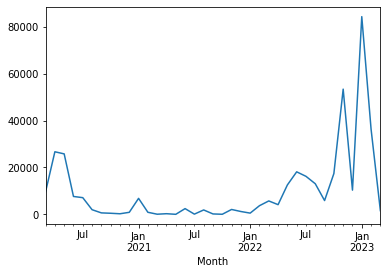

In [22]:
df.groupby("Month").sum()["Laid_Off_Count"].plot()